# Disclaimer
While case study is real, data is modified for educational purposes.

## Dataset
- You can download the dataset here.
- The different versions of the dataset are present in the `raw` directory.
- Use images in the `color` folder.

## Description
The PlantVillage dataset consists of healthy and unhealthy leaf images divided into 38 categories by species and disease.

## Task
You are asked to train a model with the following steps:
1. Classify image data
2. Find optimal learning rate
3. Evaluate loss and accuracy
4. See most confused classes (confusion matrix and top confused pictures)
5. Save the model

## Steps to Complete the Homework:
1. Name your final Homework Script as “Plant disease Classification”.
2. Create a repository named “Fastai-plant_disease” in your GitHub account and push your script to this repository.
3. Fork other users’ repositories, make pull requests (at least one, making three pull requests is desirable).

**Note:** Your pull requests should either fix problems or add new features.


# Qeyd
Case study həqiqidir, lakin dataset təhsil məqsədləri üçün dəyişdirilmişdir.  

## Dataset
- Dataseti buradan yükləyə bilərsiniz.  
- Datasetin müxtəlif versiyaları `raw` qovluğunda mövcuddur.  
- `color` qovluğundakı şəkillərdən istifadə edin.  

## Təsvir
PlantVillage dataseti sağlam və xəstə yarpaq şəkillərindən ibarətdir və 38 kateqoriyaya (bitki növləri və xəstəliklər) bölünmüşdür.  

## Tapşırıq
Sizdən aşağıdakı addımlarla bir model qurmağınız tələb olunur:  
1. Şəkil məlumatını təsnif edin.  
2. Optimal learning rate tapın.  
3. Loss və dəqiqliyi qiymətləndirin.  
4. Ən çox qarışdırılmış siniflərə baxın (confusion matrix və ən çox qarışan şəkilləri göstərin).  
5. Modeli yadda saxlayın.  

## Tapşırığı Tamamlamaq üçün Addımlar:
1. Son tapşırıq skriptinizi “Plant disease Classification” adlandırın.  
2. GitHub hesabınızda “Fastai-plant_disease” adlı bir repository yaradın və skriptinizi həmin repository-ə yükləyin.  
3. Digər istifadəçilərin repository-lərini fork edin və pull request-lər yaradın (ən azı bir, ideal olaraq üç pull request yaradın).  

**Qeyd:** Pull request-ləriniz problemləri həll etməli və ya yeni xüsusiyyətlər əlavə etməlidir.

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
# code bag-a dusurse
#config Completer.use_jedi = False

In [ ]:
# !nvidia-smi komandasının icrası, sistemdəki NVIDIA GPU-nun vəziyyətini göstərir.
# Bu əmr aşağıdakı məlumatları təqdim edir:
# 1. GPU-nun modeli
# 2. Yaddaşın istifadə miqdarı və boş yaddaş
# 3. GPU-nun işləmə temperaturu
# 4. GPU-nun istifadə faizi
# 5. GPU istifadə edən proseslər haqqında məlumat
!nvidia-smi

Thu Nov 21 07:40:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch
torch.__version__

'2.5.1+cu121'

In [ ]:
# fastai kitabxanasını tam olaraq import edir
# Bu, fastai-nin bütün modul və funksiyalarını daxil edir
from fastai import *

# fastai.vision modulunu import edir
# Bu modul şəkil tanıma və işləmə ilə bağlı funksiyalar və siniflər təqdim edir
from fastai.vision import *

# fastai.vision.all modulu, fastai.vision ilə əlaqəli bütün funksiyaları və sinifləri daxil edir
# Bu, ən çox istifadə olunan funksiyaları və metodları təmin edir
from fastai.vision.all import *

### Data yuklneir

In [ ]:
# os modulunu import edir
# Bu modul, əməliyyat sistemi ilə əlaqəli funksiyaları təmin edir (məsələn, fayl sistemini idarə etmək)
import os

# Kaggle konfiqurasiya fayllarının yerləşdiyi qovluğu təyin edir
# Bu əmr, Kaggle API istifadə edərkən konfiqurasiya faylını '/content' qovluğunda axtarmağa imkan verir
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:

# Bu kod, Kaggle API istifadə edərək 'vipoooool/new-plant-diseases-dataset' adlı dataset-i yükləyir.
# Dataset, 'new-plant-diseases-dataset' adı ilə yüklənəcək və `.zip` formatında olacaq.
# Kodun işləməsi üçün əvvəlcə Kaggle API açarınızın (`kaggle.json`) Google Colab-a yüklənmiş olması və
                                                                              # uyğun qovluğa yerləşdirilməsi lazımdır.
# !kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [01:13<00:00, 42.5MB/s]
100% 2.70G/2.70G [01:13<00:00, 39.6MB/s]


In [ ]:
# Bu kod, 'new-plant-diseases-dataset.zip' adlı sıxılmış (zip) faylı açır.
# Kod işləndikdən sonra zip faylının içindəki bütün fayllar həmin anki iş mühitinə çıxarılacaq.
# Fayl sıxılmadan sonra dataset-dəki şəkil və digər fayllara daha rahat daxil olmaq mümkün olacaq.
# !unzip new-plant-diseases-dataset.zip

In [ ]:
import os
print(os.getcwd())  # Cari qovluğu göstərir

/content


In [ ]:
print(os.listdir('/content'))  # /content-dəki bütün fayl və qovluqları göstərir

['.config', 'new plant diseases dataset(augmented)', 'test', 'new-plant-diseases-dataset.zip', 'drive', 'New Plant Diseases Dataset(Augmented)', 'sample_data']


In [ ]:
# Bu kodda 'data_path' dəyişəni, yuxarıda açılmış olan datasetin yerləşdiyi qovluğu göstərir.
# '/content/New Plant Diseases Dataset (Augmented)' qovluğu, yüklənən datasetin çıxarıldığı yerdir.
# Bu yolla datasetin içindəki fayllara və qovluqlara asanlıqla daxil olmaq mümkündür.
data_path = '/content/New Plant Diseases Dataset(Augmented)'

### Data Preparation

In [40]:
# Bu kod, 'ImageDataLoaders' istifadə edərək şəkilləri yükləmək və işlətmək üçün bir məlumat yükləyici yaradır.
# 'data_path' dəyişənində göstərilən qovluqdan şəkillər yüklənir.
# 'item_tfms' dəyişəni şəkillərin əvvəlcədən işlənməsi üçün təsadüfi ölçüdə kəsilməsini (RandomResizedCrop) müəyyən edir.
# 'batch_tfms' isə şəkillərin normalizasiyasını həyata keçirir ki, bu da modelin daha yaxşı öyrənməsinə kömək edir.
# 'valid_pct=0.2' isə verilənlərin 20%-ni doğrulama (validation) üçün ayırır.

tfms_for_item = RandomResizedCrop(128, min_scale=0.55)  # Şəkilləri təsadüfi ölçüdə kəsir (crop).
tfms_for_batch = [Normalize.from_stats(*imagenet_stats)]  # Şəkilləri ImageNet statistikaları ilə normalizə edir.

data = ImageDataLoaders.from_folder(
                                data_path,               # Datasetin yolu.
                                item_tfms=tfms_for_item,  # Şəkillərin əvvəlcədən işlənməsi.
                                batch_tfms=tfms_for_batch, # Şəkillərin normalizasiyası.
                                valid_pct=0.2            # Verilənlərin 20%-ini doğrulama üçün ayır.
                                )

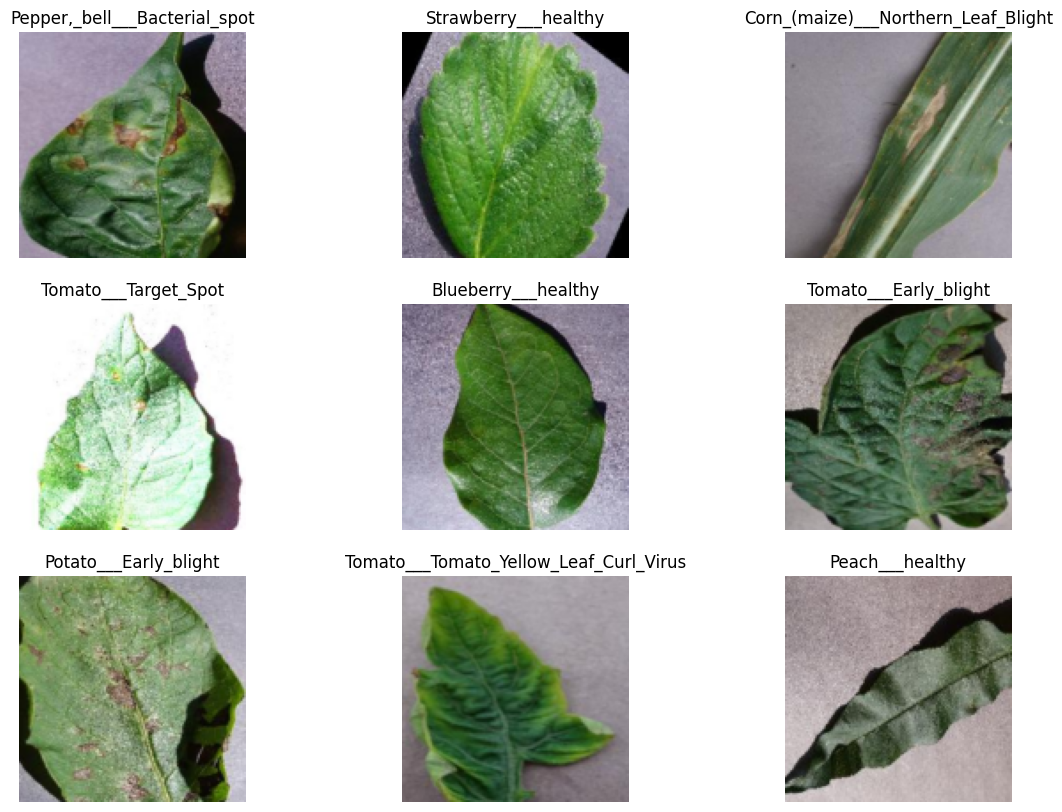

In [41]:
# Bu kod, yüklənmiş datasetdən təsadüfi şəkillərin bir qrupunu göstərir.
# "data.show_batch(figsize=(14,10))" funksiyası ilə datasetdən 16 təsadüfi şəkil seçilir və onları 4x4 şəkildə göstərir.
# "figsize" parametri ilə göstərilən şəkillərin ölçüsü (14, 10) kimi təyin edilir.
# Bu funksiya, modelin öyrədilməsi və ya test edilməsi üçün şəkillərin vizuallaşdırılmasında faydalıdır.
data.show_batch(figsize=(14,10))

In [50]:
# Datasetdəki siniflərin sayını çap edir
print('Number of classes:', data.c)  # 'data.c' siniflərin ümumi sayını verir.

Number of classes: 38


In [49]:
# Datasetdən class (sinif) adlarını əldə etmək
class_names = data.vocab

print("Class Names:", class_names[:4])

Class Names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']


### Creat Model

In [51]:
# CNN modelini qurur, 'data' ImageDataLoaders obyektini, 'resnet34' modelini və müəyyən edilmiş metrikləri istifadə edir.
model = cnn_learner(
    # Datasetin təlim və doğrulama üçün istifadə edilən obyekt.
    data,
    # Modelin əsası olaraq ResNet-34 arxitekturasını istifadə edir.
    resnet34,
    # Modelin performansını qiymətləndirmək üçün səhv nisbəti (error_rate) və düzgünlük (accuracy) metrikləri.
    metrics=[error_rate, accuracy],
    # Modelin təlimi zamanı saxlanacağı direktoriyanın yolu.
    model_dir= "/tmp/model/"
)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 163MB/s]


In [52]:
model.summary()

Sequential (Input shape: 64 x 3 x 128 x 128)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 64 x 64   
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 32 x 32   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

### Train Stage

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.0010000000474974513)

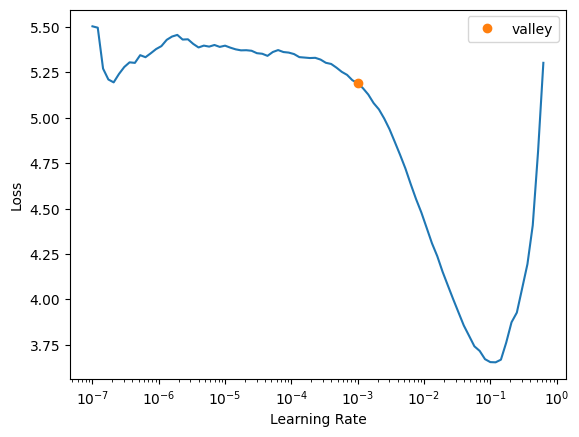

In [53]:
# Model üçün optimal öyrənmə sürətini (learning rate) təyin edir.
model.lr_find()

In [54]:
# Modeli bir tam dövr (epoch) ərzində müəyyən edilmiş maksimum öyrənmə sürəti ilə öyrədir.
model.fit_one_cycle(
    n_epoch=1,                  # Təlim üçün dövrlərin (epochs) sayı.
    lr_max=0.0010000000474974513  # Maksimum öyrənmə sürəti (learning rate).
)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.219539,0.093984,0.031355,0.968645,04:20


### Model save

In [55]:
model.save('my_model.pkl')

Path('/tmp/model/my_model.pkl.pth')

### Show Results

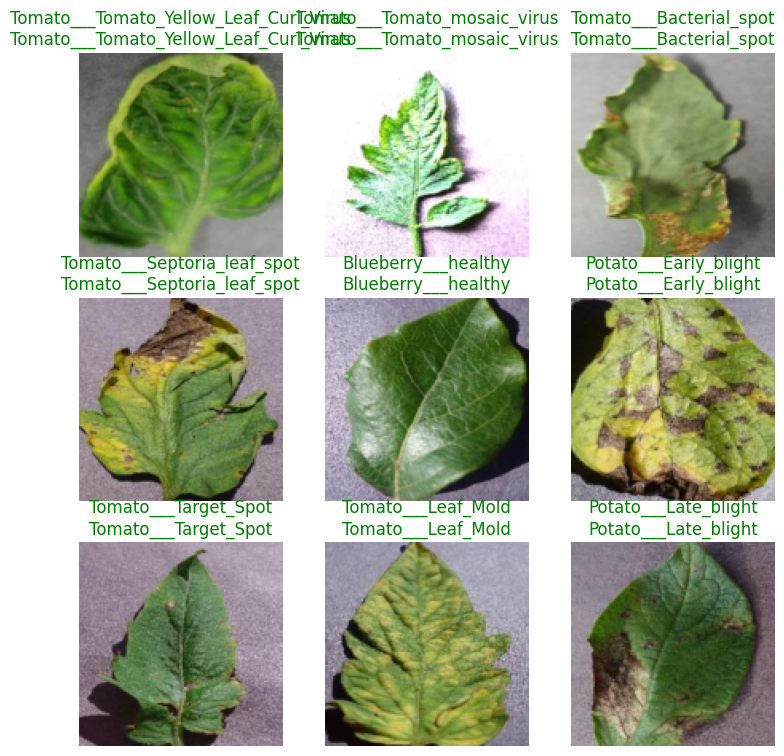

In [57]:
# Modelin təlim (train) verilənlərindəki nəticələrini vizual şəkildə göstərir.
model.show_results()

### Interpretation Losses

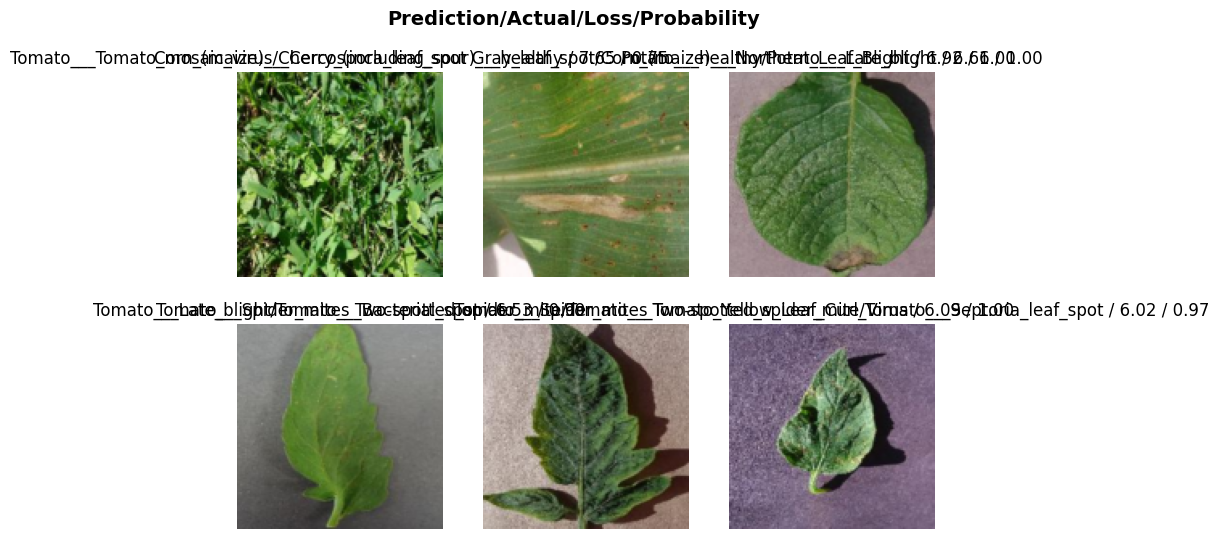

In [59]:
# Modelin performansını dərinlə analiz edir və ən çox səhv etdiyi nümunələri göstərir.
interpretation = Interpretation.from_learner(model) # Öyrədilmiş modeli interpretasiya üçün istifadə edir.


# Ən çox itkiyə (loss) səbəb olan 15 nümunəni vizual şəkildə göstərir.
interpretation.plot_top_losses(
    k=6  # Göstəriləcək nümunələrin sayı.
)

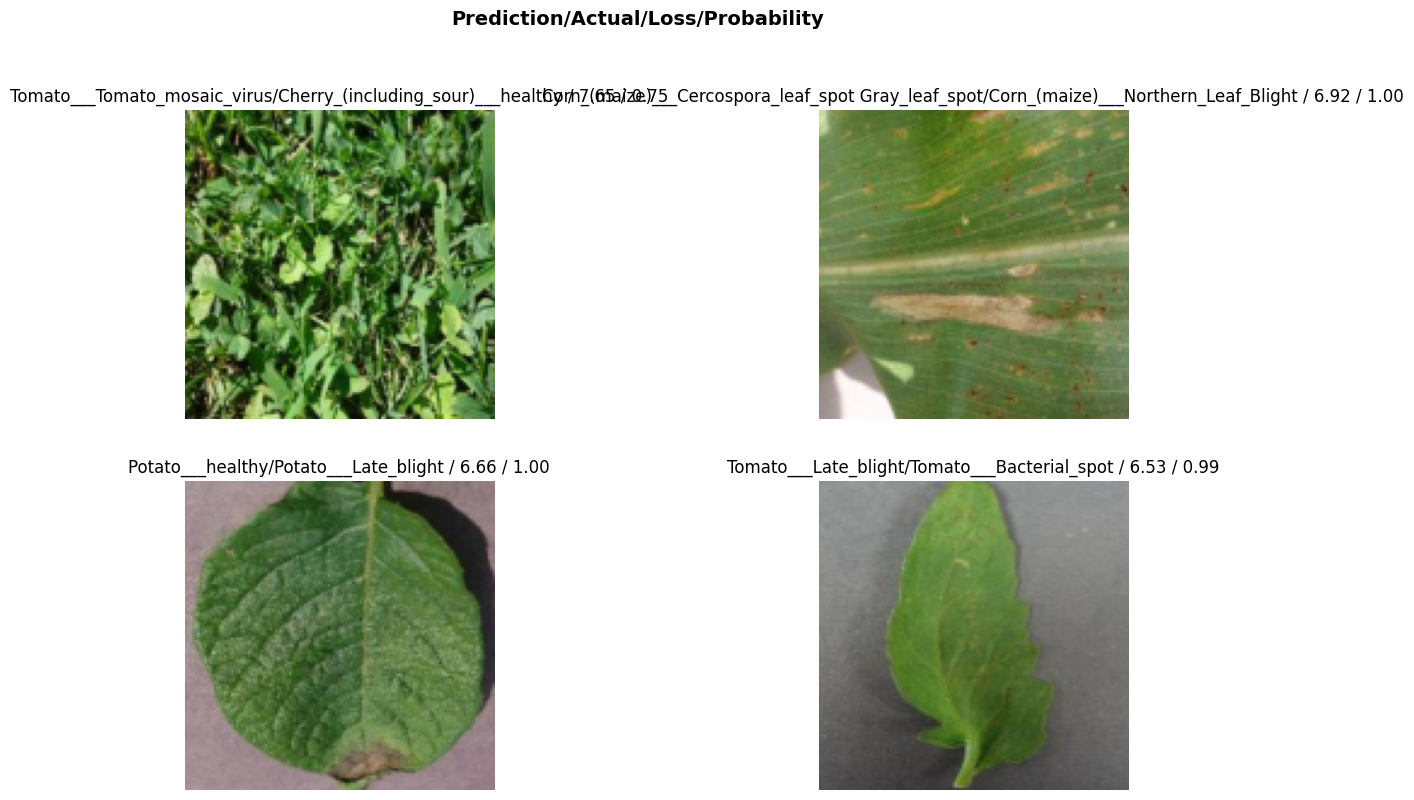

In [65]:
import matplotlib.pyplot as plt

# Top losses plotunu göstərərkən:
interpretation.plot_top_losses(k=4, figsize=(15, 10))

# Adlar arasındakı məsafəni artırmaq
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=90)
plt.show()

### Interpretation Confusion Matrix Classification

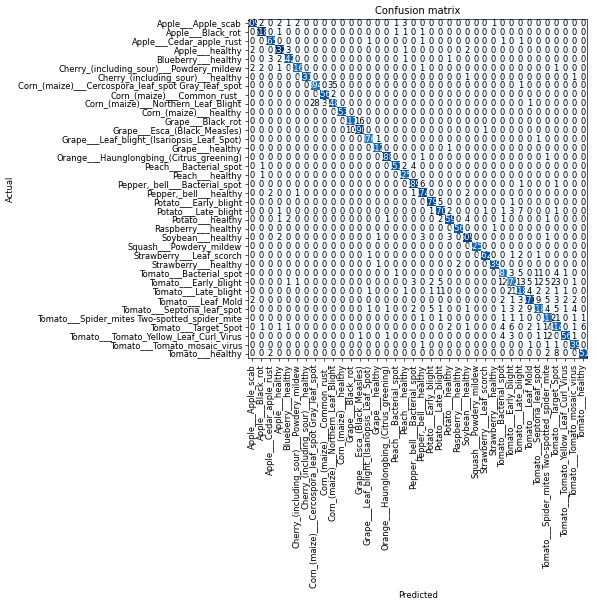

In [61]:
# Modelin sinifləndirmə nəticələrinin təhlilini aparır.
# Öyrədilmiş modelin sinifləndirmə interpretasiyasını alır.
interp = ClassificationInterpretation.from_learner(model)

# Konfuzion matrisi (confusion matrix) vizual şəkildə göstərir.
interp.plot_confusion_matrix(
    figsize=(15, 10),  # Qrafikin ölçüləri.
    dpi=60            # Qrafikin keyfiyyəti (dots per inch).
)

### Test Stage and Metrics

In [66]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score,\
                                                                                                   confusion_matrix

# 1. Validation datası üzərində proqnozları almaq
# Bu, `get_preds` funksiyası ilə olur və həm proqnozları (preds), həm də əsl etiketləri (targets) alır
preds, targets = model.get_preds(dl=data.valid)

# 2. Proqnozları ən ehtimal olunan sinfə çevirmək
# Bu ehtimalların ən yüksək dəyərinə uyğun olan sinfi alırıq
pred_labels = preds.argmax(dim=1)

# 3. Metrikləri hesablamaq
accuracy = accuracy_score(targets, pred_labels)
f1 = f1_score(targets, pred_labels, average='weighted')
recall = recall_score(targets, pred_labels, average='weighted')
precision = precision_score(targets, pred_labels, average='weighted')
conf_matrix = confusion_matrix(targets, pred_labels)
class_report = classification_report(targets, pred_labels)

# 4. Nəticələri çap etmək
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9686
F1 Score: 0.9686
Recall: 0.9686
Precision: 0.9687
Confusion Matrix:
[[509   2   0 ...   0   0   0]
 [  0 518   0 ...   0   0   0]
 [  0   0 465 ...   0   0   0]
 ...
 [  0   0   0 ... 456   1   0]
 [  0   0   0 ...   0 439   0]
 [  0   0   2 ...   0   0 451]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       521
           1       0.99      0.99      0.99       522
           2       0.99      0.99      0.99       469
           3       0.98      0.99      0.98       540
           4       0.98      0.98      0.98       449
           5       0.99      0.98      0.99       423
           6       1.00      1.00      1.00       433
           7       0.93      0.92      0.92       430
           8       0.99      1.00      0.99       458
           9       0.92      0.93      0.93       480
          10       1.00      1.00      1.00       453
          11       0.98      0.96      0.97       

### Real Forecast

In [69]:
from google.colab import files
uploaded = files.upload()

Saving case_study_2.jpg to case_study_2.jpg


In [70]:
from fastai.vision.all import PILImage

# Şəkili `PILImage` kimi yükləyin
img_path = "case_study_2.jpg"  # Şəkil yolunu dəqiq göstərmək lazımdır
img = PILImage.create(img_path)  # `PILImage.create` ilə şəkili yükləyərək Fastai-nin gözlədiyi formata çeviririk

# Proqnoz almaq
pred_class, pred_idx, outputs = model.predict(img)

# Nəticəni çap etmək
print(f"Proqnozlaşdırılan sinif: {pred_class}")
print(f"Sinif indeks nömrəsi: {pred_idx}")
print(f"Ehtimallar: {outputs}")

Proqnozlaşdırılan sinif: Pepper,_bell___Bacterial_spot
Sinif indeks nömrəsi: 18
Ehtimallar: tensor([5.6201e-05, 6.0941e-03, 5.7356e-04, 6.9265e-06, 2.3722e-02, 6.6302e-04,
        1.0557e-05, 1.3822e-03, 1.0722e-02, 6.8813e-04, 2.1247e-05, 1.4367e-05,
        6.7518e-07, 4.8992e-04, 1.1444e-05, 1.1350e-03, 2.4512e-03, 2.4080e-03,
        6.2304e-01, 2.9273e-01, 3.0227e-03, 3.4949e-03, 1.1528e-03, 1.5301e-05,
        1.4217e-05, 1.1898e-04, 2.9882e-05, 8.9447e-06, 5.8113e-05, 1.2772e-04,
        9.2417e-04, 1.3514e-04, 2.7671e-04, 8.5071e-03, 1.5089e-02, 8.6113e-06,
        5.0260e-04, 2.8874e-04])


### Check Forecast

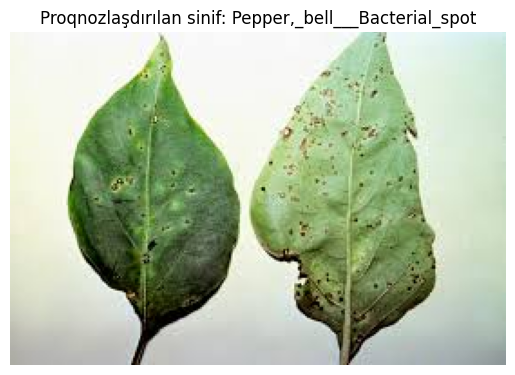

In [72]:
import matplotlib.pyplot as plt
from fastai.vision.all import PILImage

# Şəkili yükləyin və `PILImage` kimi oxuyun
img_path = "case_study_2.jpg"
img = PILImage.create(img_path)

# Proqnozlaşdırma
pred_class, pred_idx, outputs = model.predict(img)

# Şəkili və proqnozu vizuallaşdırın
plt.imshow(img)
plt.title(f"Proqnozlaşdırılan sinif: {pred_class}")
plt.axis("off")  # Oks koordinatlarını gizlədir
plt.show()